In [2]:
import numpy as np
import pandas as pd

In [4]:
perch = pd.read_csv("/content/drive/MyDrive/30619 장우준 인공지능/dataset/perch단순회귀.csv")
perch.sample(5)

,Species,Weight,Length,Diagonal,Height,Width
33,Perch,250.0,27.5,28.9,7.2828,4.5662
28,Perch,197.0,25.6,27.0,6.5610,4.2390
52,Perch,1000.0,43.0,45.2,11.9328,7.2772
31,Perch,260.0,27.5,28.9,7.1672,4.3350
43,Perch,690.0,37.0,39.3,10.5717,6.3666


In [5]:
perch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.8+ KB


In [6]:
perch.describe()

,Weight,Length,Diagonal,Height,Width
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,382.239286,27.892857,29.571429,7.861870,4.745723
std,347.617717,9.021668,9.529509,2.878177,1.774626
min,5.900000,8.400000,8.800000,2.112000,1.408000
25%,120.000000,21.825000,23.325000,5.692500,3.525000
50%,207.500000,25.300000,26.750000,6.921800,4.154900
75%,692.500000,36.625000,39.075000,10.846500,6.448125
max,1100.000000,44.000000,46.600000,12.800200,8.142000


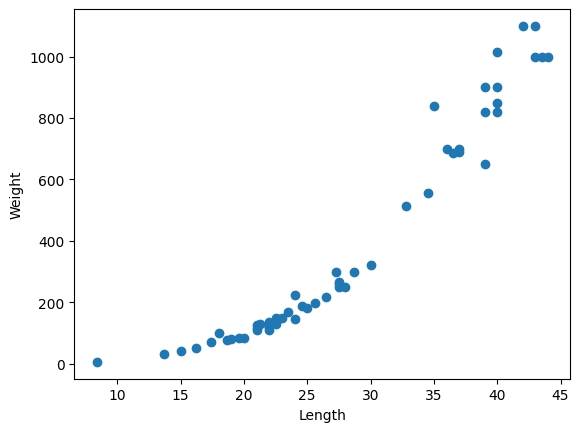

In [8]:
import matplotlib.pyplot as plt

plt.scatter(perch["Length"], perch["Weight"])
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

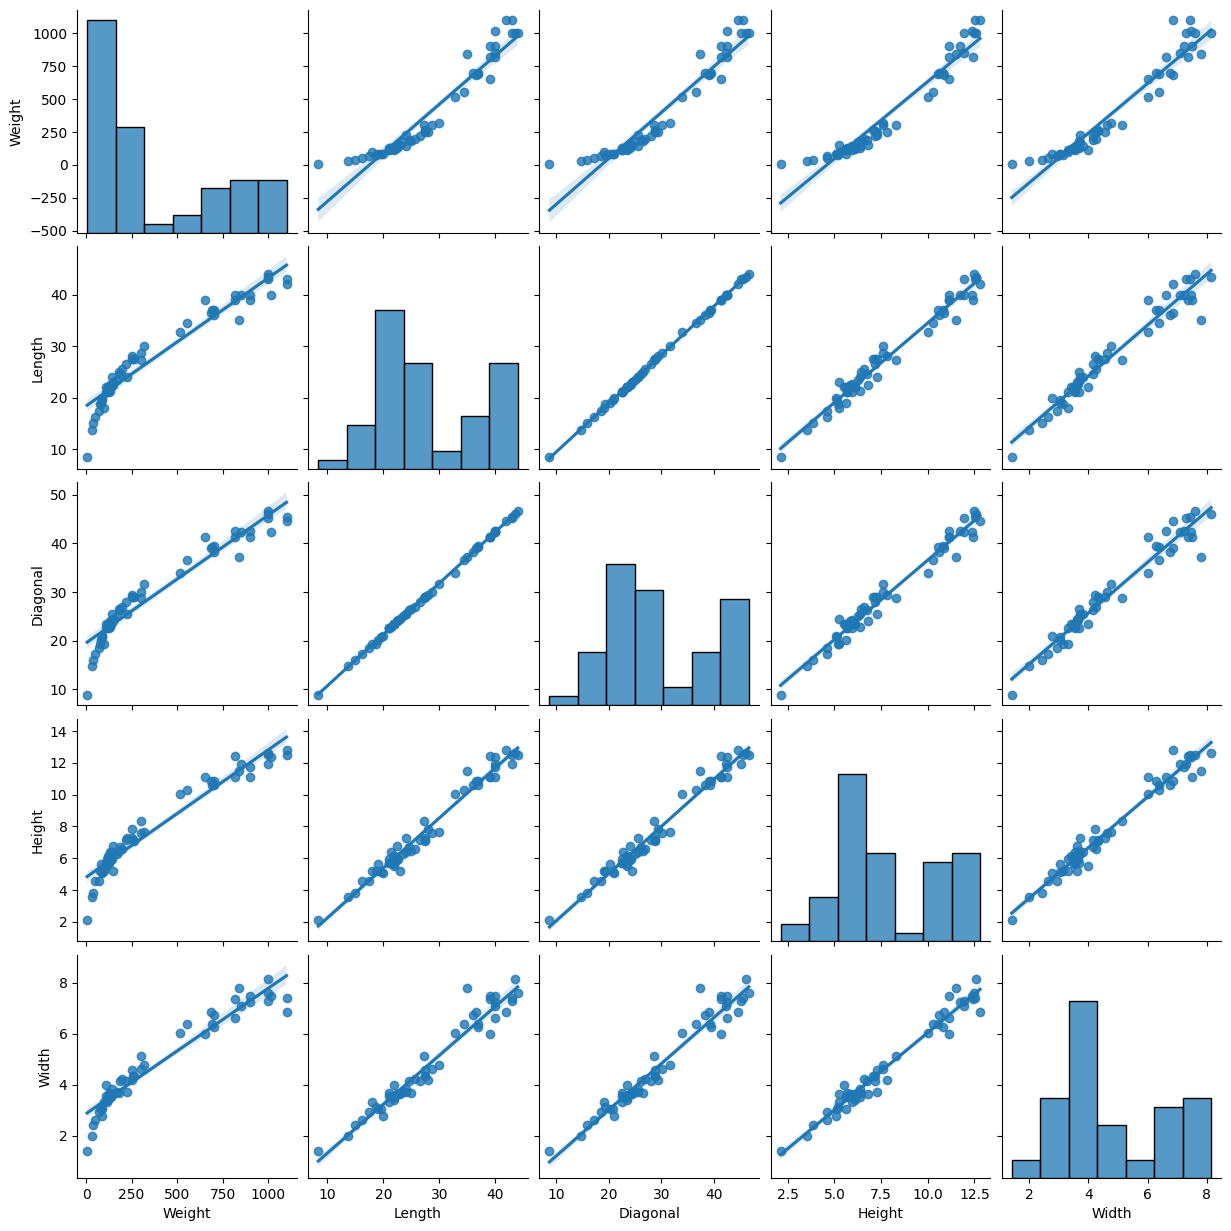

In [9]:
import seaborn as sns
sns.pairplot(perch, kind = "reg")

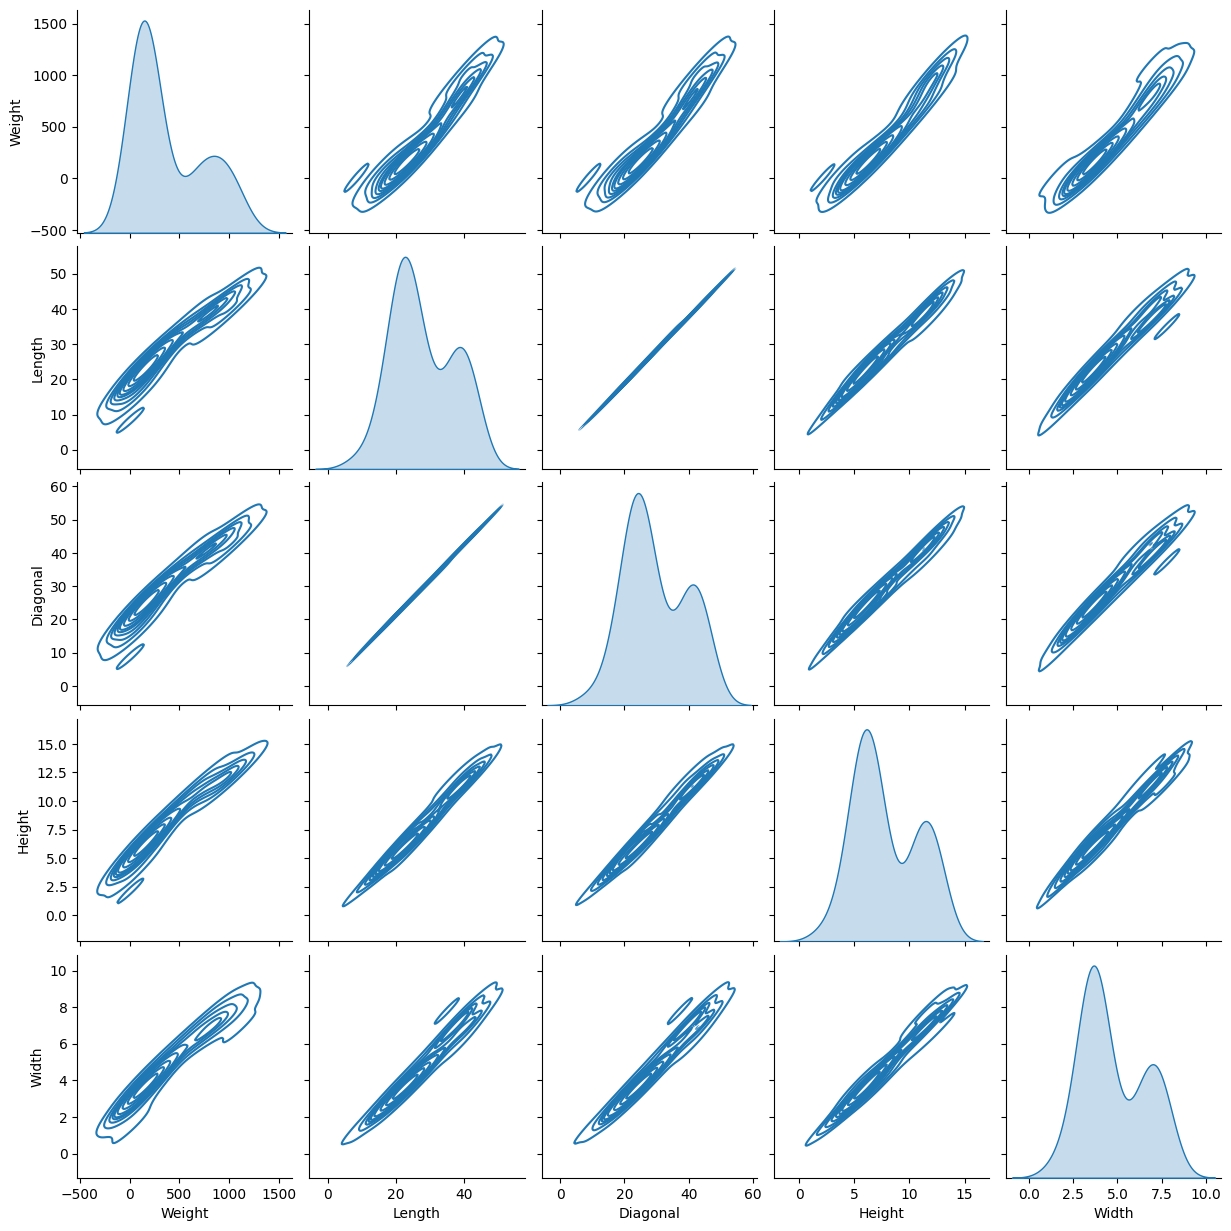

In [10]:
sns.pairplot(perch, kind = "kde")

In [11]:
corr = perch.corr(numeric_only=True)
corr

,Weight,Length,Diagonal,Height,Width
Weight,1.000000,0.958656,0.959506,0.968441,0.963943
Length,0.958656,1.000000,0.999779,0.985584,0.974617
Diagonal,0.959506,0.999779,1.000000,0.985909,0.975131
Height,0.968441,0.985584,0.985909,1.000000,0.982943
Width,0.963943,0.974617,0.975131,0.982943,1.000000


<Axes: >

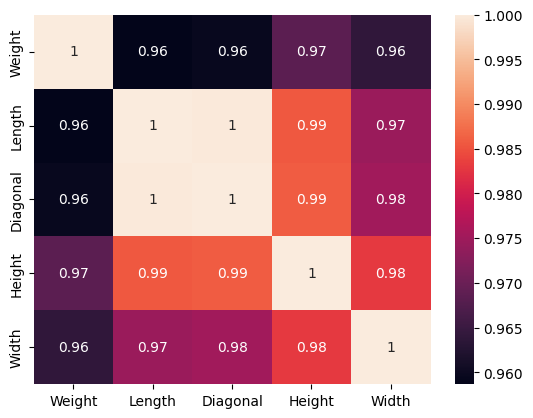

In [12]:
sns.heatmap(corr, annot=True)

### 1. 쉬운 회귀: 독립 변수 1, 종속변수 1 - knn
- 2가지 방법이 있음
  - 1. 애초에 2차원으로 독립 변수 X 만들기
  - 2. numpy 배열로 변환 후 reshape 사용

#### 1. 2차원으로 독립 변수 X 만들기

In [14]:
X = perch[["Length"]]
y = perch["Weight"]
print(X.shape, y.shape)

(56, 1) (56,)


In [15]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X, y)
print(f"knr score = {knr.score(X, y)}")

knr score = 0.9793648682718722


In [16]:
X = perch.drop(["Species", "Weight"], axis = 1)
X.shape

(56, 4)

In [17]:
knr.fit(X, y)
print(f"knr score = {knr.score(X, y)}")

knr score = 0.9818626902055709


#### 2. numpy 배열을 사용하는 경우

In [18]:
X = perch["Length"].to_numpy()
y = perch["Weight"]

print(X.shape, y.shape)

(56,) (56,)


In [20]:
# 오류
# knr.fit(X, y)
# print(f"knr score = {knr.score(X, y)}")

In [23]:
test = np.array([1, 2, 3, 4])
print(test.shape)
print(test.reshape(2, 2))
print(test.reshape(-1, 1))

(4,)
[[1 2]
 [3 4]]
[[1]
 [2]
 [3]
 [4]]
